# Supervised Learning : Classification Task

## Context

You are a data scientist working for a historical research institution. As part of a project on early 20th century maritime disasters, you have been tasked with studying the tragic sinking of the Titanic. Specifically, the organization is interested in understanding the factors that contributed to a passenger's likelihood of survival.

The institution has collected a dataset containing information about the Titanic passengers, including their age, sex, passenger class (1st, 2nd, or 3rd class), and whether or not they survived the disaster. They want you to create a machine learning model to predict a passenger's likelihood of survival based on these features.

In addition to building the model, the institution also wants to understand the decision-making process of the model. This will not only shed light on what factors were most important in determining a passenger's survival, but will also provide insights that can guide future historical research.


This context can set the stage for the data loading, preprocessing, model training, and model evaluation steps provided in the activity. The visualization of the decision tree can be presented as a way for the researchers to understand what factors the model deems important in predicting a passenger's survival.

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns # To load the titanic data set too
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder # to encode the categorical variable
from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # to visualize the Tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

## 1. Data Loading

We will start by loading the data. The Titanic dataset is available in many repositories and platforms, including directly via seaborn library.

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Exploratory Data Analysis

Perform some EDA

Let's start fist by understanding our data

### Variable description

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Here are some description of variables : 

- `survival`: Survival, 0 = No, 1 = Yes
- `pclass` : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
- `sex` : Sex
- `Age`: Age in years
- `sibsp`: # of siblings / spouses aboard the Titanic	
- `parch`: # of parents / children aboard the Titanic	
- `ticket`: Ticket number
- `fare`: Passenger fare
- `deck`: Passenger Deck
- `embarked`: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton
- `embark_town` : Port of Embarkation : Cherbourg, Queenstown, Southampton

### Data type

pclass is a categorical column, so we need to convert it

In [7]:
titanic['pclass']= titanic['pclass'].astype('category')
# Check
titanic[['pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   pclass  891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


In [13]:
titanic.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

### Remove unnecessary features

For sex: `sex`, `who` and `adult_male` columns provide redundant information.

We'll delete than the `who` and `adult_male` columns

In [8]:
titanic = titanic.drop(['who','adult_male'], axis = 1)

The same thing applies to :
- `embarked` and `embark_town`, which represent the passenger's port of embarkation. This is redundant information, so we'll remove the `embark_town` column
- `survived` and `alive`, wich represente the passenger's survival.This is redundant information, so we'll remove the `alive` column
- `pclass` and `class`, wich represente the passenger's class.This is redundant information, so we'll remove the `class` column

In [9]:
titanic = titanic.drop(['embark_town','alive', 'class'], axis = 1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,C,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,C,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,True


In [69]:
# describe numerical data type
titanic.describe()

,survived,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
titanic.describe(include = ['object', 'category', 'bool'])

,pclass,sex,embarked,deck,alone
count,891,891,889,203,891
unique,3,2,3,7,2
top,3,male,S,C,True
freq,491,577,644,59,537


top = mode :  the most frequent category 

### Target class distribution

0    0.616162
1    0.383838
Name: survived, dtype: float64


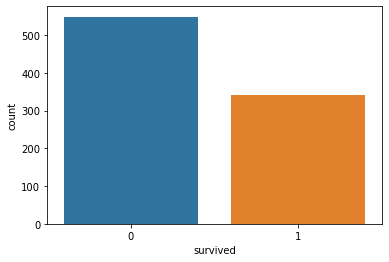

In [10]:
print(titanic['survived'].value_counts()/len(titanic))
sns.countplot(x='survived', data=titanic)
plt.show()

## 2. Data Preprocessing

Before training the model, we need to preprocess the data. This includes handling missing values, converting categorical data into numerical data, and splitting the data into training and testing sets.

### 1. Handling missing values

In [11]:
titanic.isnull().sum().sort_values(ascending=False)/len(titanic)*100

deck        77.216611
age         19.865320
embarked     0.224467
survived     0.000000
pclass       0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
fare         0.000000
alone        0.000000
dtype: float64

We'll delete the `deck` column because it accounts for 77% of missing values. This column doesn't provide much information about our passenger.

We will then remove the remaining missing values in the dataset..

In [12]:
# Dropping the column deck
titanic = titanic.drop(['deck'], axis = 1)
# Check
titanic.isnull().sum().sort_values(ascending=False)/len(titanic)*100

age         19.865320
embarked     0.224467
survived     0.000000
pclass       0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
fare         0.000000
alone        0.000000
dtype: float64

In [13]:
# Drope the remaning missing value in age, embarked columns
titanic = titanic.dropna()
# Check
titanic.isnull().sum().sort_values(ascending=False)/len(titanic)*100

survived    0.0
pclass      0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
embarked    0.0
alone       0.0
dtype: float64

- Check the target class distribution

0    0.595506
1    0.404494
Name: survived, dtype: float64


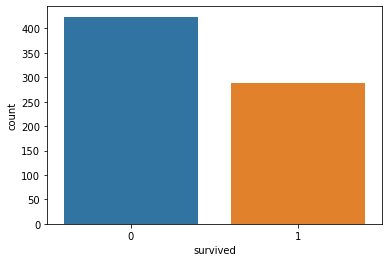

In [17]:
# Check the the target class distribution
print(titanic['survived'].value_counts()/len(titanic))
sns.countplot(x='survived', data=titanic)
plt.show()

### 2. Features selection

To build our machine learning model, we will focus on the following features:
- `age`
- `sex`
- `pclass`
- `embarked`
- `alone`
- `sibsp`
- `parch`

`sibsp` and `parch` are discrete variable

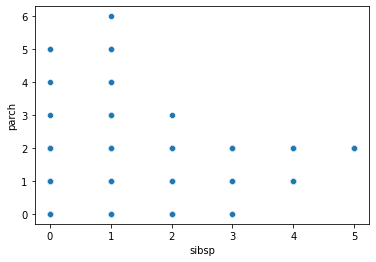

In [21]:
sns.scatterplot(x = 'sibsp', y = 'parch', data = titanic)
plt.show()

In [24]:
titanic['sibsp'].value_counts()

0    469
1    183
2     25
4     18
3     12
5      5
Name: sibsp, dtype: int64

In [25]:
titanic['parch'].value_counts()

0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [31]:
# Select features
X = titanic[['pclass', 'age', 'sex','embarked','alone', 'parch', 'sibsp']] 

y = titanic['survived']

In [28]:
X.head()

,pclass,age,sex,embarked,alone,parch,sibsp
0,3,22.0,male,S,False,0,1
1,1,38.0,female,C,False,0,1
2,3,26.0,female,S,True,0,0
3,1,35.0,female,S,False,0,1
4,3,35.0,male,S,True,0,0


### 3. Handle categorical variables

The `get_dummies()` function, part of the pandas library in Python, is a useful tool for transforming categorical data into dummy or indicator variables. 

In this process, each category within a categorical variable is turned into a separate column in the dataset, with the values in these columns set as 0s and 1s. A value of 1 signifies that the category is applicable, while a 0 denotes its absence.

However, this process can create redundancy in your dataset, leading to what is known as the dummy variable trap. This trap arises when you can easily deduce the value of one variable from the values of the other variables. For example, if you know the values of n-1 variables, you can determine the value of the nth variable.

To avoid this trap, you can use the `drop_first = True` option in the `get_dummies()` function. This removes the first dummy variable, effectively eliminating the redundancy. This does not result in any loss of information because the remaining n-1 variables still convey all the necessary information about the original variable that had n categories.

In [32]:
X = pd.get_dummies(X, columns=['sex', 'pclass', 'embarked', 'alone'], drop_first = True, dtyp = int)
# Check
X.head()

,age,parch,sibsp,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S,alone_True
0,22.0,0,1,1,0,1,0,1,0
1,38.0,0,1,0,0,0,0,0,0
2,26.0,0,0,0,0,1,0,1,1
3,35.0,0,1,0,0,0,0,1,0
4,35.0,0,0,1,0,1,0,1,1


### 4. Split the data into training and testing sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here, we're dealing with missing values by dropping any rows that contain them, and we're converting the 'sex' column from a categorical variable to a numerical one. Finally, we're splitting the dataset into a training set (80% of the data) and a testing set (20% of the data).

## 3. Model Training

Now we're ready to train our model. For this activity, we'll use a decision tree classifier.

In [34]:
# Initialize the model
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

We're initializing a decision tree classifier and fitting it to our training data. This trains the model to predict survival based on the features we provided ('pclass', 'sex', and 'age').

## 4. Model Evaluation

Finally, let's evaluate our model using accuracy score and confusion matrix.

In [35]:
# Make predictions
y_pred_dt = dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy}')

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.7622377622377622
Confusion Matrix:
[[68 12]
 [22 41]]


Here, we're making predictions on our testing set and calculating the accuracy of those predictions. The accuracy score is the proportion of correct predictions made by the model. The confusion matrix shows the breakdown of true positives, true negatives, false positives, and false negatives.

- **Accuracy**

In [51]:
Accuracy = (68+41)/(68+12+22+41)
Accuracy

0.7622377622377622

=> 76% the model gives correct predictions

In [50]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        80
           1       0.77      0.65      0.71        63

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



Confution matrix illustration

                                    Predict
                
                               0            1   
                               
     Not Survived      0       TP          TN   
        
        Survived       1       FP          FN   


                 Predict
                 
                0      1    Recall

        0       68     12   0.85
        
        1       22     41   0.65

    Precision  0.76   0.77  

- **Precision**

For class 0 : Not survived

In [39]:
precision_class0 = 68/(68+22)
precision_class0

0.7555555555555555

=> 76% the model predict corecctly the Not survived of passenger, Class : 0

For class 1 : Survived

In [40]:
precision_class1 = 41/(12+41)
precision_class1

0.7735849056603774

=> 77% the model predict corecctly the survived of passenger, Class : 1

- **Recall**

Class 0 :  Not survived

In [41]:
recall_class0 = 68/(68+12)
recall_class0

0.85

=> The model correctly identifies 85% pessenger as Not servived (Class 0)

Class 1 : Survived

In [42]:
recall_class1 = 41/(22+41)
recall_class1

0.6507936507936508

=> he model correctly identifies 65% pessenger as servived (Class 1)

In [55]:
y_pred_dt = dt_clf.predict(X_test)
y_pred_dt

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

- Example of prediction
thresholds = 0.5
if the proba > 0.5 => class = 1
if not the proba <= 0.5 => class = 0

In [60]:
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:,1]
y_pred_proba_dt

array([1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.66666667,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.57142857, 1.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.25      , 1.        ,
       1.        , 0.        , 0.        , 0.09090909, 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.5       , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.5       ,
       0.        , 0.2       , 0.        , 1.        , 0.5       ,
       0.        , 0.        , 0.        , 0.2       , 1.     

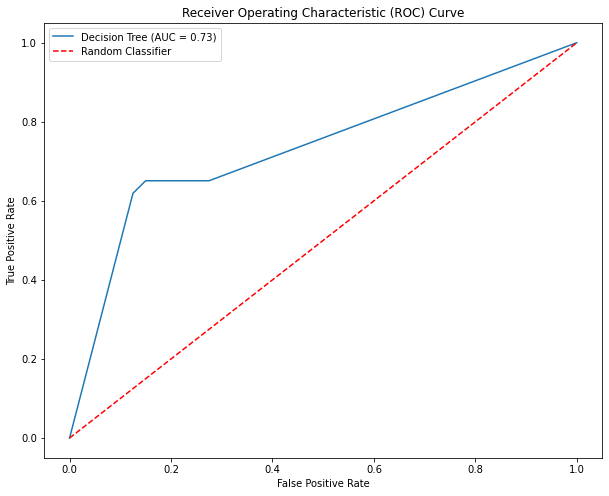

In [52]:
# Get the model's probability predictions for the positive class
y_pred_proba_dt = dt_clf.predict_proba(X_test)[::,1]

# Compute the ROC curve
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_proba_dt)

# Calculate AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

## 5. Visualizing the Decision Tree

visualizing the decision tree can be done using libraries like `sklearn` and `matplotlib`. Here is how you could add a visualization of the decision tree to the activity:

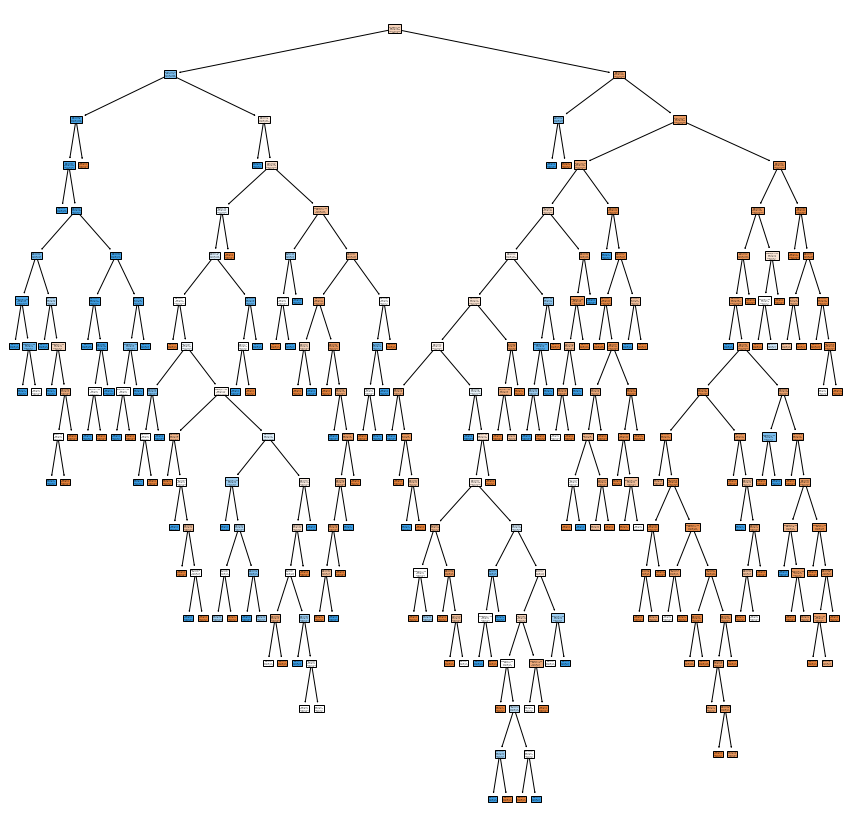

In [61]:
# Plot the decision tree
plt.figure(figsize=(15,15))
plot_tree(dt_clf, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.show()

This will produce a visual representation of the decision tree. Each node in the tree represents a decision (a split), with the topmost node being the first (best) decision the model makes based on the features.

This code creates a decision tree, fits it to the training data, and then uses matplotlib and sklearn.tree's plot_tree function to create a visual representation of the decision tree. The feature_names parameter is used to label the splits, and the class_names parameter is used to label the leaves.

Remember that decision trees can get very complex when dealing with large datasets, so the resulting plot might be too large and complicated to be easily interpretable if your dataset has a lot of features or if the tree is very deep.

This will generate a plot of the decision tree. Each node in the tree represents a decision (a split), with the topmost node being the first (best) decision the model makes based on the features. This can help you understand what factors the model considers important in predicting a passenger's survival.

# Random Forest

Random Forest is an ensemble method that trains multiple decision trees and averages their predictions.

## 1. Model Training

In [64]:
# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 2. Model Evaluation

- Confusion Matrix

In [65]:
# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.7762237762237763
Confusion Matrix:
[[67 13]
 [19 44]]


In [66]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        80
           1       0.77      0.70      0.73        63

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.77       143



- ROC Curve 

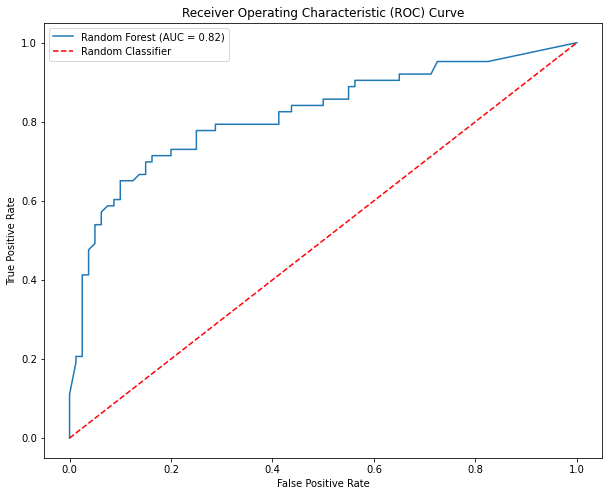

In [67]:
# Get the model's probability predictions for the positive class
y_pred_proba_rf = rf_clf.predict_proba(X_test)[::,1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf)

# Calculate AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

# Comparison : Decision Tree vs Random Forest 

Besides accuracy and the confusion matrix, another way to evaluate model performance is the ROC Curve, which shows the trade-off between true positive rate and false positive rate. The area under the ROC Curve (AUC) can be used as a single number summary of model performance.

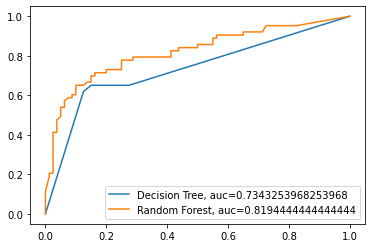

In [68]:
# Decision Tree
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, auc="+str(roc_auc_dt))

# Random Forest
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc="+str(roc_auc_rf))

plt.legend(loc=4)
plt.show()

This will plot ROC curves for both the Decision Tree and Random Forest classifiers, along with their respective AUC scores. This graphical comparison can be really helpful to understand which model performs better on your classification task.

Based on the AUC metrics, it can be concluded that the Random Forest model exhibits superior prediction performance compared to the Decision Tree model.